Assignment Task 6<br>Name: Niraj Kumar Yadav(22MCA0281)

Importing Required Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
import nltk

Loading the Daataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DATASET_1/complaints.csv")

<ipython-input-3-ee6494577c27>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/DATASET_1/complaints.csv")


In [ ]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-08-24,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,Experian Information Solutions Inc.,NJ,07024,NaN,Other,Web,2023-08-24,In progress,Yes,NaN,7452639
1,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"SANTANDER HOLDINGS USA, INC.",FL,33972,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7512160
2,2023-07-13,Checking or savings account,Checking account,Problem caused by your funds being low,Overdrafts and overdraft fees,Citibank allowed debit card transactions to ov...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,XXXXX,NaN,Consent provided,Web,2023-07-13,Closed with explanation,Yes,NaN,7244354
3,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",FL,33884,Servicemember,NaN,Web,2023-08-25,Closed with non-monetary relief,Yes,NaN,7453721
4,2023-09-13,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"SANTANDER HOLDINGS USA, INC.",TX,77521,NaN,NaN,Web,2023-09-13,Closed with explanation,Yes,NaN,7542838


#EDA

In [ ]:
print("Dataset Info:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4091495 entries, 0 to 4091494
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memo

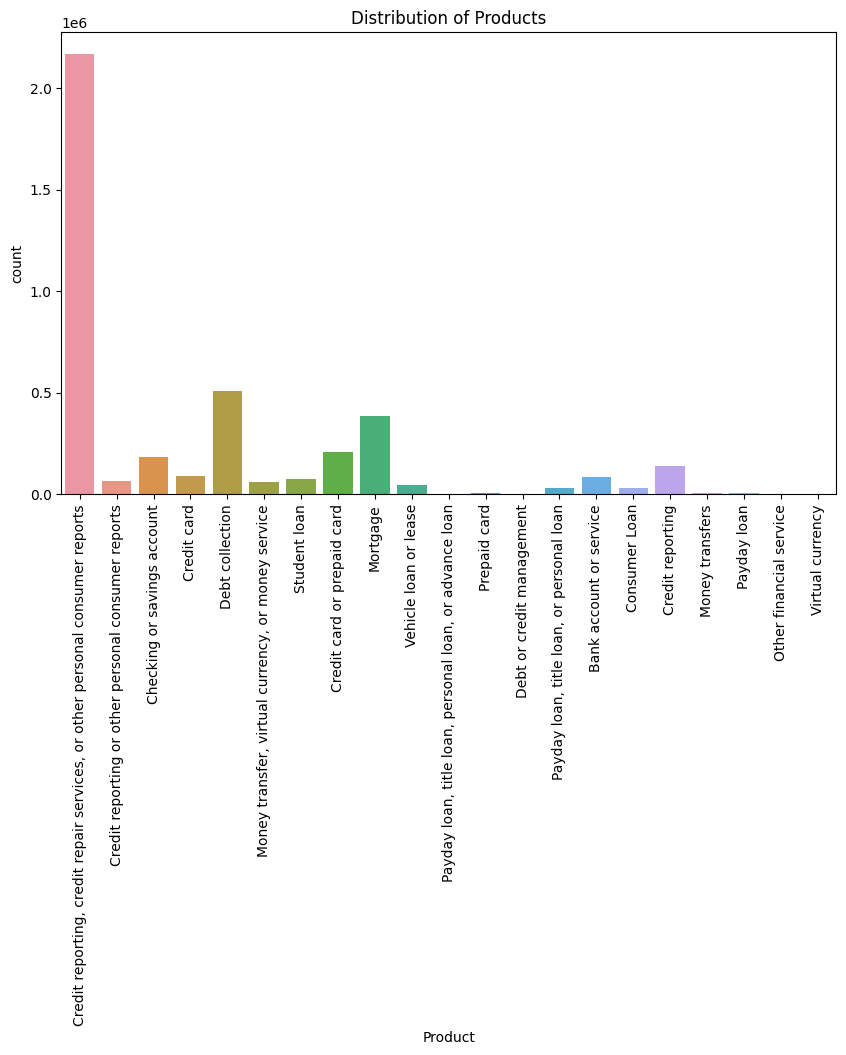

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Product', data=data)
plt.title('Distribution of Products')
plt.xticks(rotation=90)
plt.show()

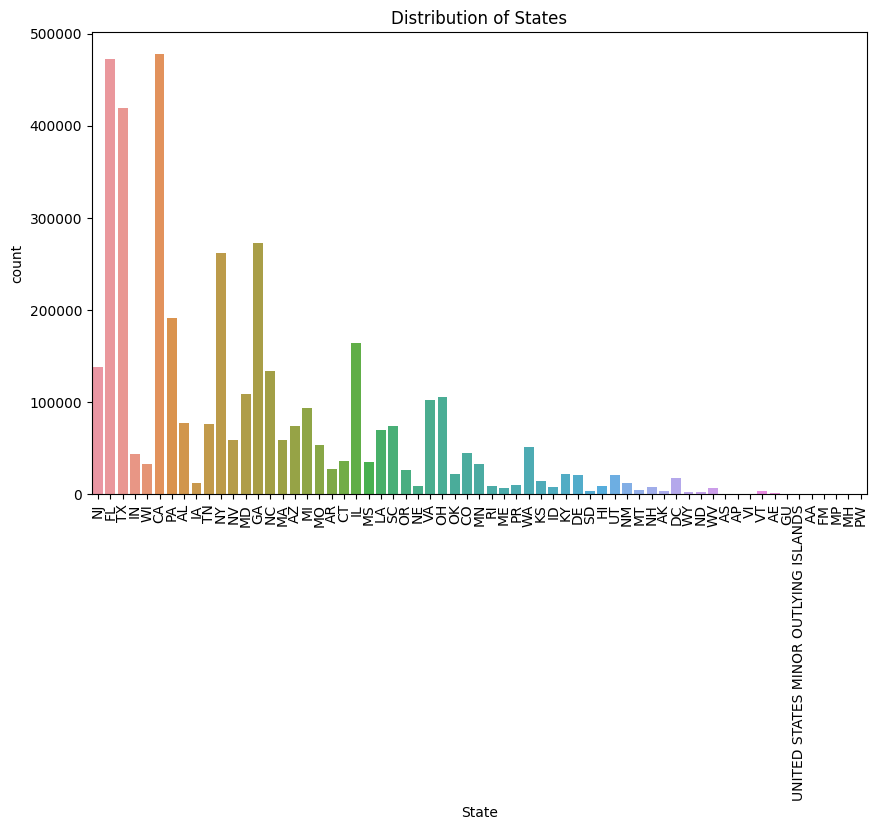

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='State', data=data)
plt.title('Distribution of States')
plt.xticks(rotation=90)
plt.show()

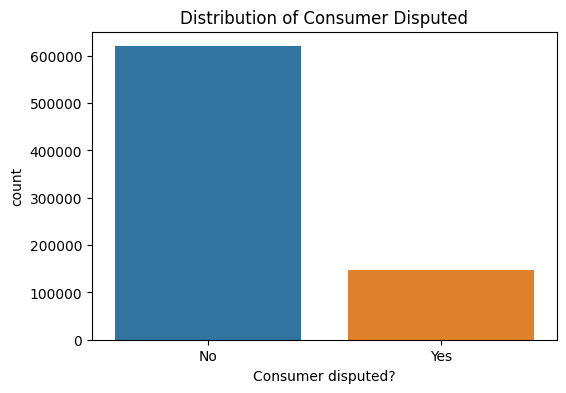

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Consumer disputed?', data=data)
plt.title('Distribution of Consumer Disputed')
plt.show()

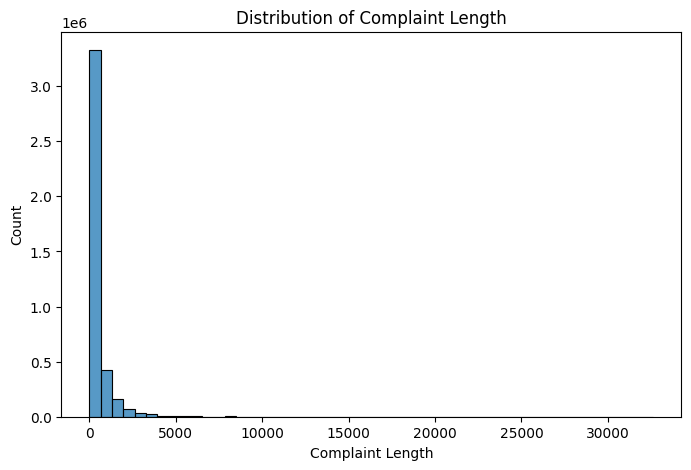

In [ ]:
data['Complaint Length'] = data['Consumer complaint narrative'].apply(lambda x: len(str(x)))
plt.figure(figsize=(8, 5))
sns.histplot(data['Complaint Length'], bins=50)
plt.title('Distribution of Complaint Length')
plt.xlabel('Complaint Length')
plt.ylabel('Count')
plt.show()

<ipython-input-10-f1c6f9643eac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


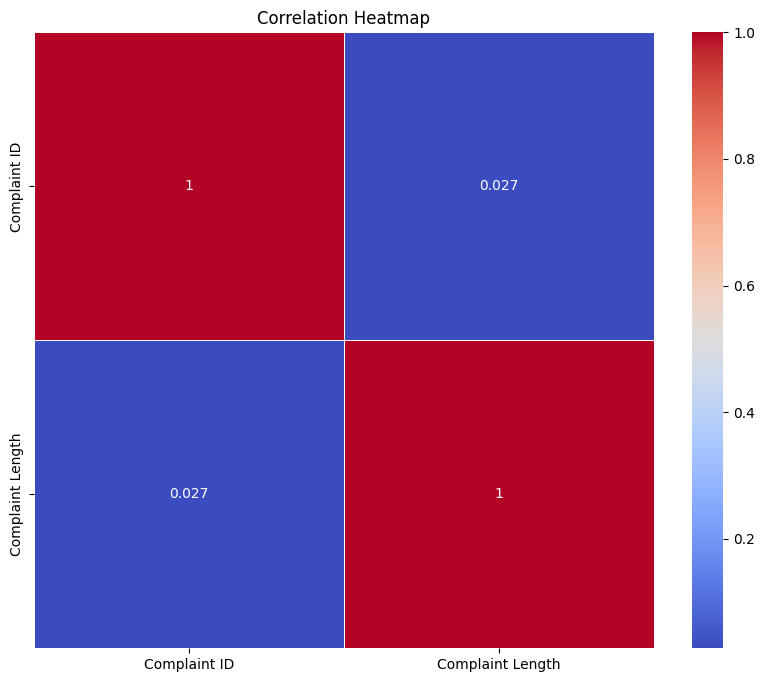

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Text Preprocessing

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


def preprocess_text(text):
    if pd.isna(text):
        text = ""

    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    processed_text = ' '.join(tokens)

    return processed_text

data['Consumer complaint narrative'] = data['Consumer complaint narrative'].apply(preprocess_text)
print(data['Consumer complaint narrative'].head())


In [ ]:
data.head()

Train-Test Split, Model Building, Training and Evaluation

In [21]:
data['Consumer complaint narrative'] = data['Consumer complaint narrative'].str.lower()
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf_vectorizer.fit_transform(data['Consumer complaint narrative'])
y = data['Product']


# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building- Multi model
model = OneVsRestClassifier(MultinomialNB())
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.62


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.73      0.02      0.05     17094
                                                 Checking or savings account       0.63      0.34      0.44     36411
                                                               Consumer Loan       0.72      0.01      0.02      6454
                                                                 Credit card       0.74      0.02      0.04     18476
                                                 Credit card or prepaid card       0.63      0.34      0.44     40843
                                                            Credit reporting       0.69      0.01      0.01     28125
                         Credit reporting or other personal consumer reports       0.00      0.00      0.00     12846
Credit reporting, credit repair services, or other pers

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Prediction

In [22]:
new_complaints = data.head(1)
X_new = tfidf_vectorizer.transform(new_complaints['Consumer complaint narrative'])
predicted_categories = model.predict(X_new)

new_complaints['Predicted Product'] = predicted_categories

<ipython-input-22-d1f85bc3579c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_complaints['Predicted Product'] = predicted_categories


In [23]:
pd.set_option('display.max_colwidth', None)

In [24]:
new_complaints['Predicted Product']

0    Credit reporting, credit repair services, or other personal consumer reports
Name: Predicted Product, dtype: object

Experiments with multple Machine Learning Models

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

# Logistic Regression
model_lr = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model_lr.fit(X_train, y_train)

# Evaluate Model
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("\nLogistic Regression Model:")
print(f'Accuracy: {accuracy_lr:.2f}')
print(classification_report(y_test, y_pred_lr))


Logistic Regression Model:
Accuracy: 0.64


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.69      0.04      0.08     17094
                                                 Checking or savings account       0.73      0.33      0.46     36411
                                                               Consumer Loan       0.62      0.04      0.07      6454
                                                                 Credit card       0.64      0.04      0.08     18476
                                                 Credit card or prepaid card       0.70      0.38      0.49     40843
                                                            Credit reporting       0.64      0.03      0.06     28125
                         Credit reporting or other personal consumer reports       0.00      0.00      0.00     12846
Credit reporting, credit repair services, or other pers

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Random Forest Classifier
model_rf = OneVsRestClassifier(RandomForestClassifier(n_estimators=100))
model_rf.fit(X_train, y_train)

# Evaluate Model
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Classifier Model:")
print(f'Accuracy: {accuracy_rf:.2f}')
print(classification_report(y_test, y_pred_rf))

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multiclass import OneVsRestClassifier


max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_rnn = tokenizer.texts_to_sequences(X_train)
X_test_rnn = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100

X_train_rnn = pad_sequences(X_train_rnn, maxlen=max_sequence_length)
X_test_rnn = pad_sequences(X_test_rnn, maxlen=max_sequence_length)

# Recurrent Neural Network - RNN
model_rnn = Sequential()
model_rnn.add(Embedding(max_words, 128, input_length=max_sequence_length))
model_rnn.add(LSTM(128))
model_rnn.add(Dense(64, activation='relu'))
model_rnn.add(Dropout(0.5))
model_rnn.add(Dense(num_classes, activation='softmax'))


model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_rnn.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluation
y_pred_rnn = model_rnn.predict(X_test_rnn)
y_pred_rnn = np.argmax(y_pred_rnn, axis=1)

accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
print("Recurrent Neural Network (RNN) Model:")
print(f'Accuracy: {accuracy_rnn:.2f}')
print(classification_report(y_test, y_pred_rnn))
